# THE SPARKS FOUNDATION

## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP JAN21

### NAME : CHIRANTHANA R R
## TASK 2 : PREDICTION USING UNSUPERVISED ML

#### QUESTION:  From the given dataset , predict the optimum number of clusters and represent it visually.

## IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

## LOADING THE DATA

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## DATA ANALYSING

In [7]:
iris_df.shape

(150, 4)

In [8]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## PLOTTING

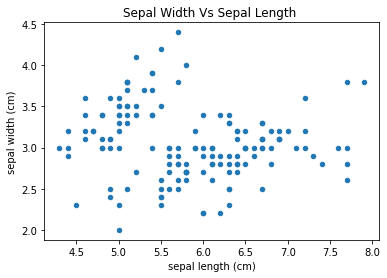

In [11]:
iris_df.plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',title='Sepal Width Vs Sepal Length ')

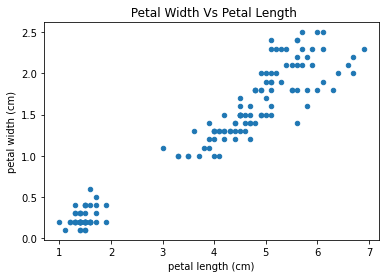

In [12]:
iris_df.plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',title=' Petal Width Vs Petal Length')

## ELBOW METHOD

In [14]:
### HOW TO FIND NO OF K VALUE AND OPTIMUM NO.OF CLUSTERS
x=iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
elb =[]

In [15]:
for i in range(1,11):
    kmeans =KMeans(n_clusters = i ,init = 'k-means++',max_iter =300,n_init = 10 ,random_state =0)
    kmeans.fit(x)
    elb.append(kmeans.inertia_)

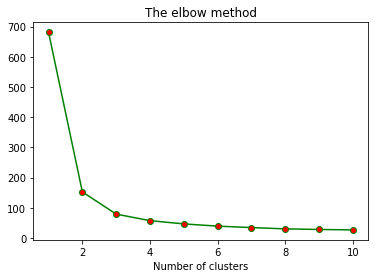

In [27]:
plt.plot(range(1,11),elb,color='green',marker='o',markerfacecolor='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel;('WCSS')#within cluster sum of spares
plt.show()


### hence, we found that the optimum number of clusters is 3, therefore we will be divinding the dataset into 3 divisions.

## VISUALISATION OF CLUSTERS

In [28]:
kmeans = KMeans(n_clusters =3,init = 'k-means++',max_iter =300,n_init=10,random_state=0)
y_kmeans =kmeans.fit_predict(x)

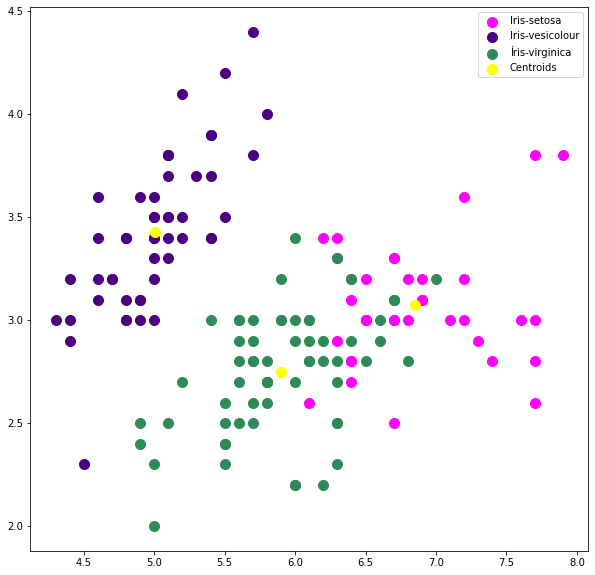

In [50]:
# plotting the clusters 
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans == 0,1],
           s = 100 ,c='magenta',label ='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],
           s =100, c='indigo',label ='Iris-vesicolour')
plt.scatter(x[y_kmeans ==2 ,0],x[y_kmeans ==2,1],
           s=100,c='seagreen',label ='Íris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s = 100 ,c ='yellow' ,label ='Centroids')
plt.legend()

## DSCAN CLUSTERING(Density-based spatial clustering of applications with noise)

In [39]:
# Importing Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [40]:
# Load Dataset
iris = load_iris()


In [41]:
# Declaring Model
dbscan = DBSCAN()


In [42]:
# Fitting
dbscan.fit(iris.data)


DBSCAN()

In [43]:
# Transoring Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)


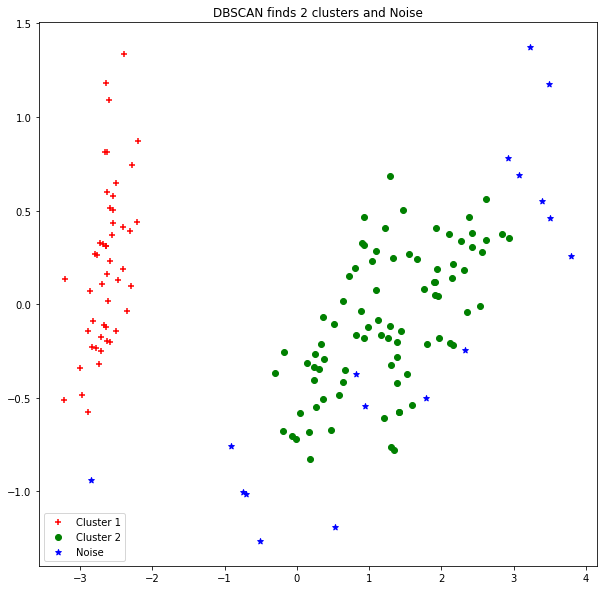

In [54]:
# Plot based on Class
plt.figure(figsize=(10,10))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
             
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()        
